<a href="https://colab.research.google.com/github/joselra98/Data-Project4/blob/main/Copia_de_Data_Project_4_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cargar Imagenes desde Kaggle**

In [ ]:
#Indicamos el Kaggle.json de la cuenta que debe coger el directorio
!mkdir ~/.kaggle #create the .kaggle folder in your root directory
!echo '{"username":"joselra98","key":"1ade57b24a97233d49a84fe0d493f4bf"}' > ~/.kaggle/kaggle.json #write kaggle API credentials to kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # set permissions
!pip install kaggle #install the kaggle library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
#Listamos los proyectos
!kaggle datasets list -s dataproject

ref                              title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------  ---------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
joselra98/dataproject            dataproject                                       4GB  2022-06-05 00:44:23             82          0  0.11764706       
datasproject/dataproject         Dataproject                                     166MB  2019-11-14 18:08:00             49          0  0.125            
racasc/dataproject4              dataproject4                                      4GB  2022-06-04 13:56:52            122          1  0.29411766       
keitazoumana/dataproject         data-project                                   1018MB  2018-10-19 13:17:42              2          2  0.25             
nayuki6918/code1161-dataproject  The most popular hero in different team-role     

In [ ]:
#Descargamos los datos 
! kaggle datasets download -d joselra98/dataproject

100% 4.32G/4.32G [00:40<00:00, 125MB/s]
100% 4.32G/4.32G [00:40<00:00, 114MB/s]


In [ ]:
!unzip dataproject.zip
import os 

Archive:  dataproject.zip
  inflating: sample_submission.csv   
  inflating: test/1.2.826.0.1.3680043.8.498.60964782211363234805993194732570333546.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.61431034517465531958162912253173088073.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.62775586541135359915919720866789455246.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.66090421685182342980503431575556713055.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.67789794435741873870140624318123072500.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.68178124482700344734822346753000091962.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.69780693352510167266847316539821108215.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.71414931266984795263697005963391289642.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.71446631430051241458602990266940324877.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.72016401052462335241200397926602631772.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.72

In [ ]:
#Eliminamos el zip de los datos
%rm -rf dataproject.zip

In [ ]:
#Creamos las subcarpetas del Train para poder clasificar las imagenes
import pandas as pd
import glob

#cargar 
train_csv = pd.read_csv("/content/train.csv")

#Crear las carpetas del train
for folder in list(train_csv.Target.unique()):
  os.mkdir(f'train/{folder}')

#Mover las imagenes a las carpetas 
for file in glob.glob("./train/*.jpg"):
  folder = train_csv.loc[train_csv.SOPInstanceUID == file[8:-4]].Target.values[0]
  path_dest = f"./train/{folder}/" + file[8:]
  os.system(f"mv {file} {path_dest}")

# Explorar y Cargar el Modelo 

In [ ]:
# Importamos la librerias
from fastai.vision import *
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Abrimos una imagen
img = open_image('/content/train/11/1.2.826.0.1.3680043.8.498.10242799675195671634897807131985000448.jpg')

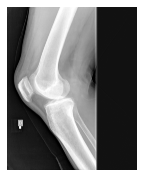

In [ ]:
img.show()

In [ ]:
#Tamaño de la imagen
img.shape

torch.Size([3, 2920, 2320])

In [ ]:
#Definimos donde se encuentra el path
path=("/content/")

In [ ]:
# Cargamos los datos y redimensionamos la imagen
batch_size =32
size = 256
data = ImageDataBunch.from_folder(path=path, train="/content/train", test="/content/test", 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms() , size=size, 
                                  bs=batch_size
                                  ).normalize(imagenet_stats)

In [ ]:
# Mostramos la clases
data.classes

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [ ]:
print(len(data.classes))

22


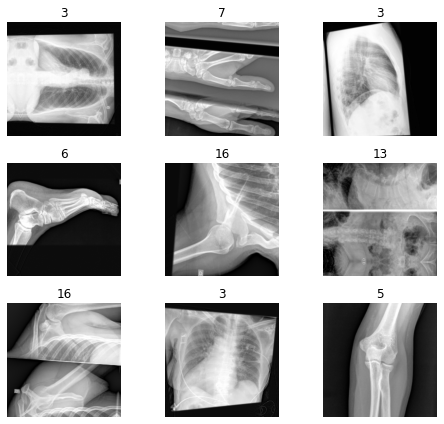

In [ ]:
# Ejemplo de las imagenes por clases
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
#Gráfica de distribución de las imagenes por clases
import seaborn as sns
sns.countplot(data = train_csv, x="Target", order=train_csv.Target.value_counts().index)
plt.xticks(rotation = 'vertical')
plt.show()

# ENTRENAMIENTO DEL MODELO

In [ ]:
# Creación del modelo de entrenamiento 
learn = cnn_learner(data, models.densenet201, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


  0%|          | 0.00/77.4M [00:00<?, ?B/s]

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine

In [ ]:
# Congelamos el modelo
learn.data = data
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-04
Min loss divided by 10: 8.32E-03


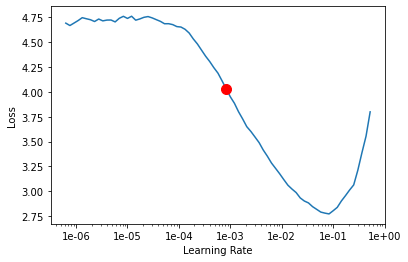

In [ ]:
# Buscamos el ratio de aprendizaje óptimo
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
# Ratio de aprendizaje optimo
lr = 1e-2

In [ ]:
# Entrenamiento con 25 epochs
learn.fit_one_cycle(25, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.922166,0.905797,0.768627,05:19
1,1.232114,0.549900,0.878431,05:16
2,0.883782,0.541616,0.882353,05:20
3,0.725806,0.859330,0.815686,05:18
4,0.754657,1.053683,0.815686,05:16
5,0.747185,0.932866,0.847059,05:19
6,0.691399,0.764225,0.866667,05:18
7,0.626925,0.791799,0.866667,05:22
8,0.599548,0.753747,0.886275,05:21
9,0.477764,0.644752,0.913725,05:21


In [ ]:
# Guardar el modelo
learn.save("score-3733")

In [ ]:
# Descongelar el modelo
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.74E-06


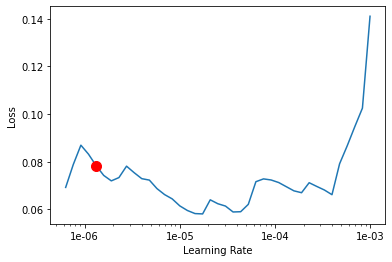

In [ ]:
# Buscar el ratio de aprendizaje óptimo
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
# Establecemos el ratio de aprendizaje
lr = 1e-6

In [ ]:
# Entrenamiento con 25 epochs
learn.fit_one_cycle(25, max_lr=slice(lr/100,lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.097972,0.431464,0.949020,05:19
1,0.082982,0.414818,0.949020,05:20
2,0.078348,0.423075,0.945098,05:21
3,0.077843,0.425814,0.945098,05:21
4,0.086841,0.424983,0.945098,05:23
5,0.093099,0.414657,0.949020,05:21
6,0.087381,0.428360,0.945098,05:21
7,0.083964,0.423361,0.945098,05:17
8,0.089986,0.410840,0.945098,05:20
9,0.089413,0.420558,0.949020,05:22


In [ ]:
# Guardamos el modelo
learn.save("score-4236")

# 3.   Evaluate results

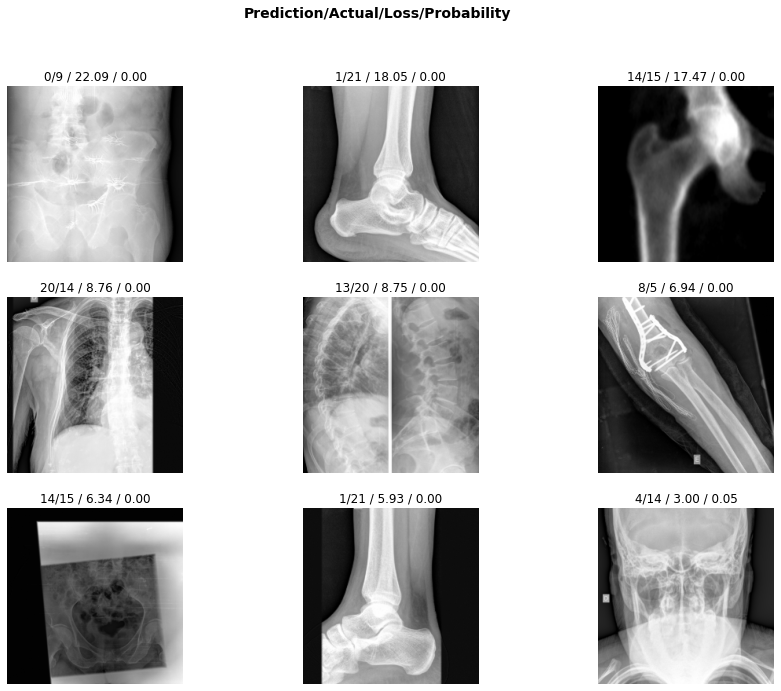

In [ ]:
# Mostrar muestras peor clasificadas
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

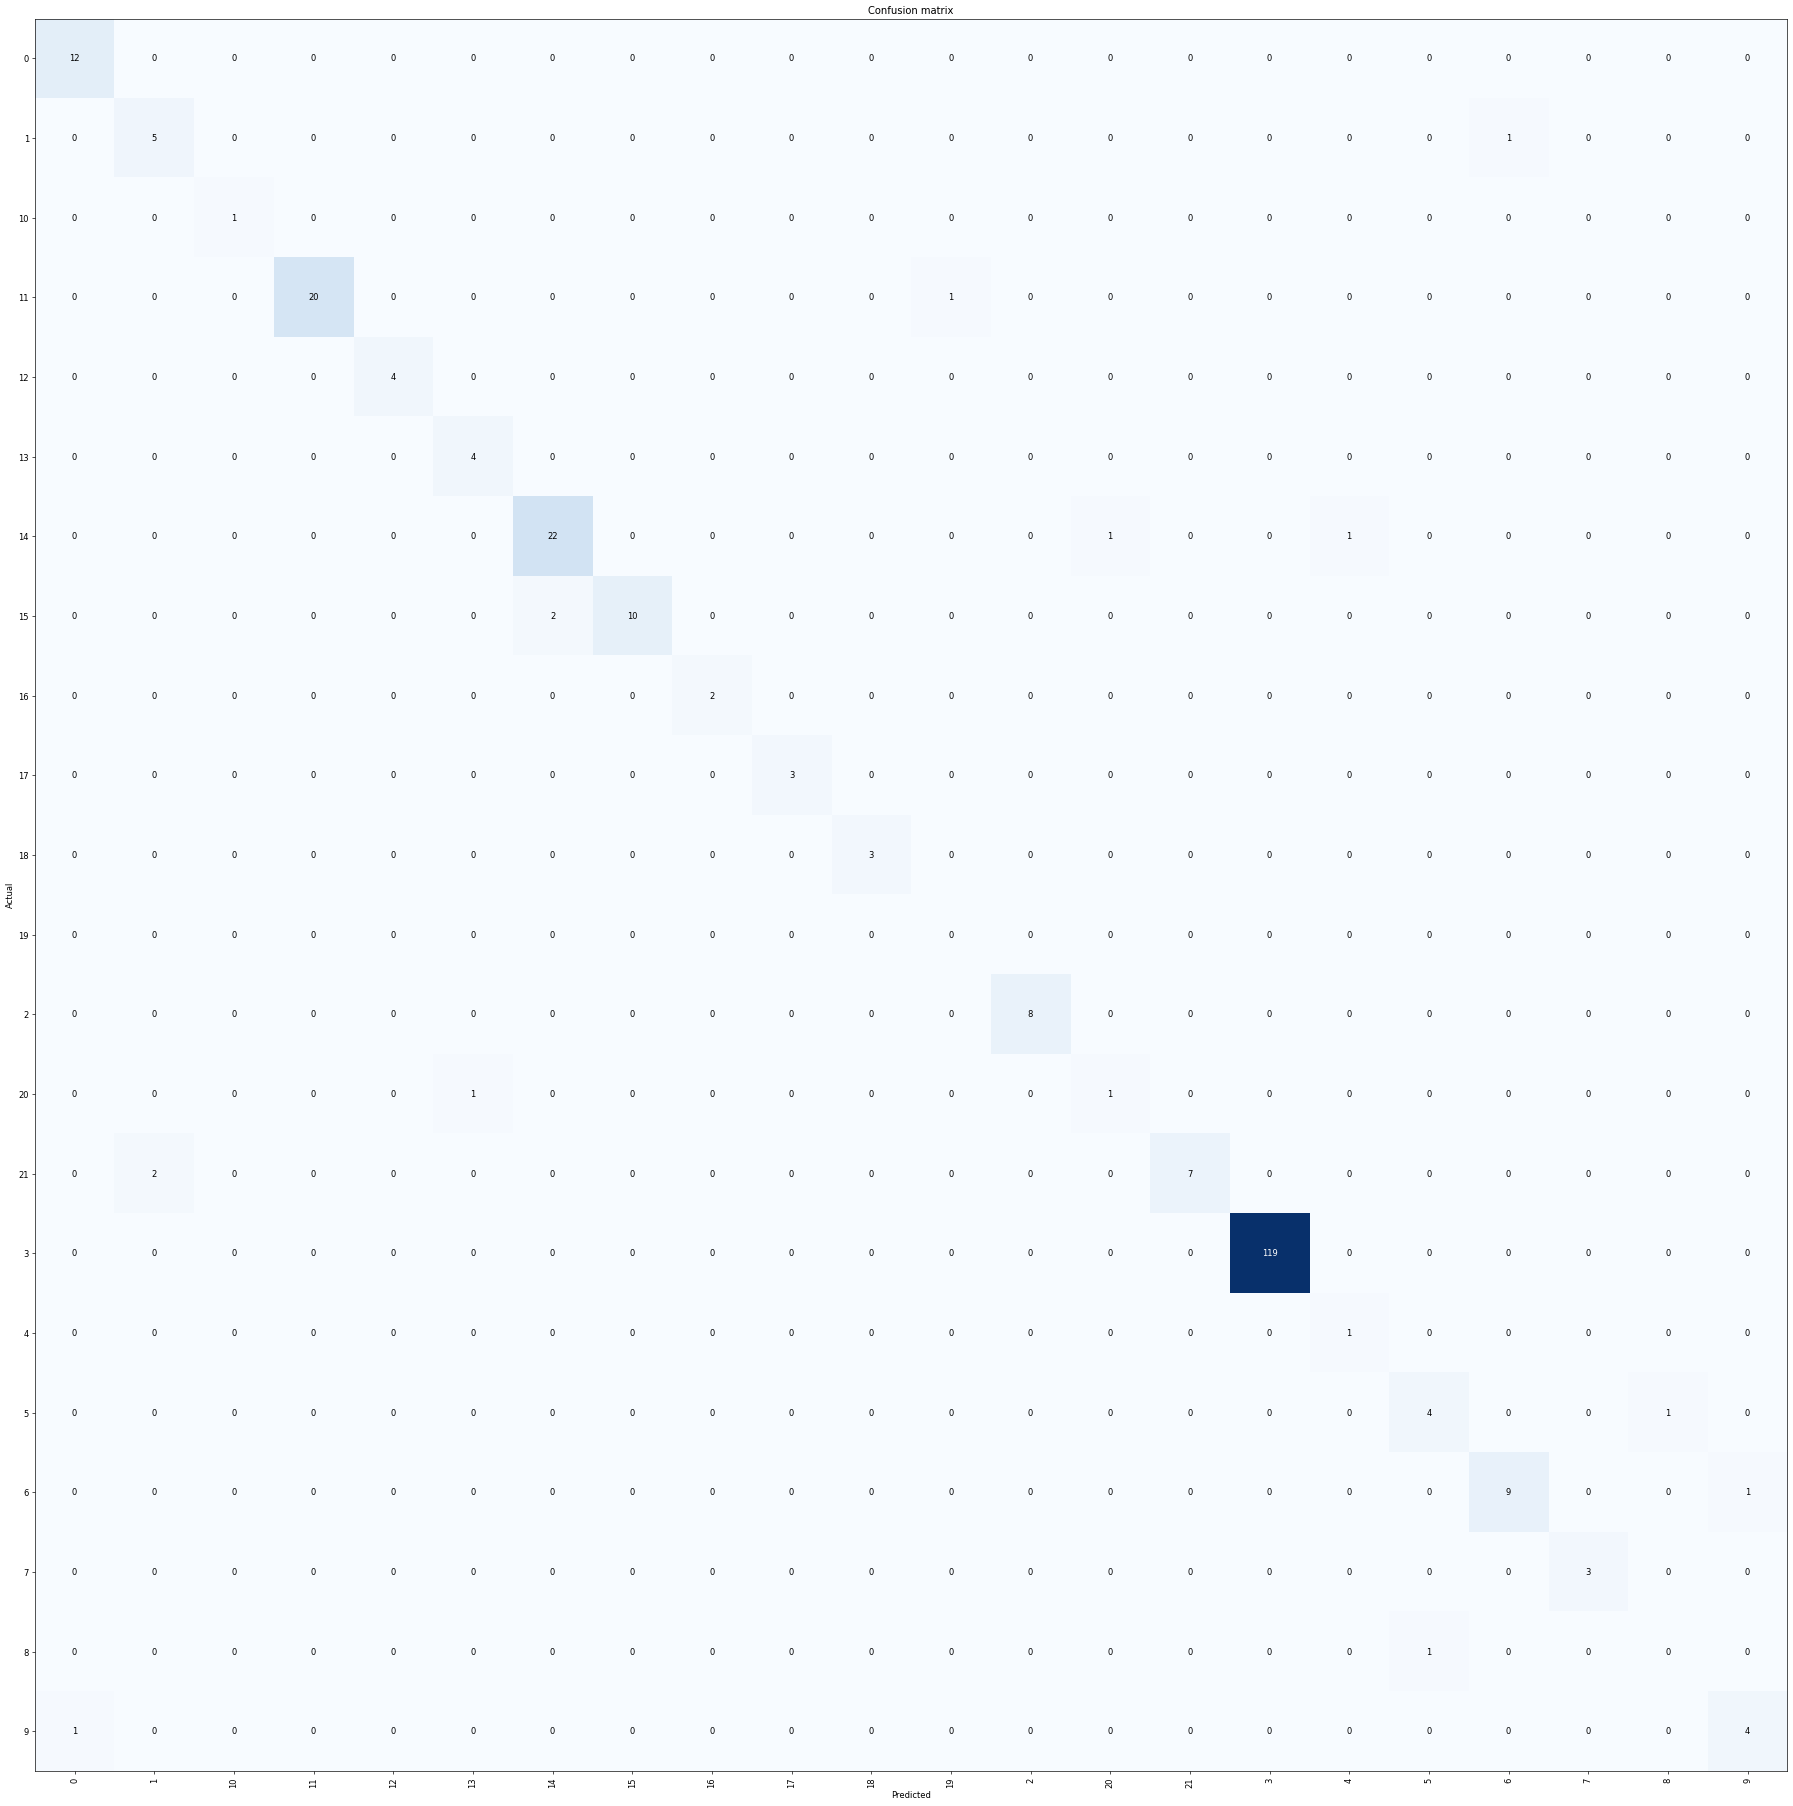

In [ ]:
# Matriz de Confusión
interp.plot_confusion_matrix(figsize=(30,30), dpi=60)

In [ ]:
# Mostrar las clases confundidas
interp.most_confused(min_val=2)

[('15', '14', 2), ('21', '1', 2)]

# **Sample Submission**

In [ ]:
Test = "/content/test"

In [ ]:
#Creamos el predictor
preds_test, target_test = learn.get_preds(DatasetType.Test)
y = torch.argmax(preds_test, dim=1)
y.numpy().shape

(328,)

In [ ]:
pred_classes = []
for index in y:
  pred_classes.append(int(data.classes[index]))

len(pred_classes)

328

In [ ]:
num = len(learn.data.test_ds)
filenames = []
for i in range(num):
  filenames.append(str(learn.data.test_ds.items[i]).split('/')[3])

In [ ]:
submission=pd.read_csv('/content/sample_submission.csv')
print(submission.shape)
submission['Target']= pred_classes
submission["SOPInstanceUID"] = filenames
submission

(328, 2)


,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.99979421603039894766...,2
1,1.2.826.0.1.3680043.8.498.85006210041675057929...,0
2,1.2.826.0.1.3680043.8.498.76250330176320020327...,3
3,1.2.826.0.1.3680043.8.498.81111929474360579039...,2
4,1.2.826.0.1.3680043.8.498.84418038323649486397...,15
...,...,...
323,1.2.826.0.1.3680043.8.498.92127115820268888239...,0
324,1.2.826.0.1.3680043.8.498.85889474153182788751...,2
325,1.2.826.0.1.3680043.8.498.91456287088316719878...,3
326,1.2.826.0.1.3680043.8.498.88201401328037140717...,10


In [ ]:
submission.to_csv('submission.csv',index=False)

In [ ]:
#Quitamos el .JPG
text = open("submission.csv", "r")
text = ''.join([i for i in text]) \
    .replace(".jpg","")
x = open("Kaggle_submission.csv","w")
x.writelines(text)
x.close()

In [ ]:
#Descargamos el precitor
kaggle_csv = pd.read_csv("/content/Kaggle_submission.csv")
kaggle_csv

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.99979421603039894766...,2
1,1.2.826.0.1.3680043.8.498.85006210041675057929...,0
2,1.2.826.0.1.3680043.8.498.76250330176320020327...,3
3,1.2.826.0.1.3680043.8.498.81111929474360579039...,2
4,1.2.826.0.1.3680043.8.498.84418038323649486397...,15
...,...,...
323,1.2.826.0.1.3680043.8.498.92127115820268888239...,0
324,1.2.826.0.1.3680043.8.498.85889474153182788751...,2
325,1.2.826.0.1.3680043.8.498.91456287088316719878...,3
326,1.2.826.0.1.3680043.8.498.88201401328037140717...,10
